# **IE 6400 - Project 2 (Time Series Classification) By Aditya Rajendra Shanbhag**

## I) Mount Google Drive to the correct directory and install all required packages.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Set working directory
%cd /content/drive/MyDrive/IE_6400_Project_2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/IE_6400_Project_2


In [ ]:
! pip install numpy pandas matplotlib seaborn scikit-learn

## II) Import all important libraries

In [ ]:
import numpy as np
import pandas as pd
import json
import io
import pprint
import pickle
import matplotlib.pyplot as plt

## III) Importing 5 subjects data from 15 subjects

Take 5 subjects for this project - S4, S7, S10, S14 and S17 from pkl file

### **A) S4 - Subject 4**

**Import S4_pickle (Main file) of Subject 4** - Joining chest data and label in a single dataset of Subject 4

In [ ]:
# Reading pkl file for S4
S4_pkl = pd.read_pickle('Subjects/S4/S4.pkl')
S4_pkl_chest_and_label = pd.DataFrame()


# Flatten chest signals and label column together
chest_signals = S4_pkl['signal']['chest']

for cskey, csvalue in chest_signals.items():
    if csvalue.ndim == 2:
        for i in range(csvalue.shape[1]):
            cskey_colnm = f'{cskey}_{i+1}'
            S4_pkl_chest_and_label[cskey_colnm] = csvalue[:, i]
    else:
        S4_pkl_chest_and_label[cskey] = csvalue.flatten()


# Adding label inside S4_pkl_chest_and_label dataframe
S4_pkl_chest_and_label['label'] = S4_pkl['label']


# Change the label names for better visibility
S4_pkl_chest_and_label.columns = ['ACC_1', 'ACC_2', 'ACC_3', 'ECG', 'EMG', 'EDA', 'TEMP', 'RESP', 'LABEL']


# Creating Final Dataframe of S4 from pkl file
S4_final_pkl_df = S4_pkl_chest_and_label
S4_final_pkl_df

,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,TEMP,RESP,LABEL
0,1.5554,-0.0784,1.3624,-1.405380,0.044174,1.096344,32.506256,2.836609,0
1,1.5130,-0.1070,1.4586,-1.399658,0.015472,1.094437,32.498779,2.839661,0
2,1.4460,-0.1042,1.0604,-1.393387,-0.032043,1.094055,32.501770,2.838135,0
3,1.3382,-0.0622,0.4234,-1.387436,-0.003799,1.094818,32.491302,2.839661,0
4,1.1958,-0.0306,-0.0164,-1.381165,0.020370,1.092911,32.501770,2.882385,0
...,...,...,...,...,...,...,...,...,...
4496095,0.8926,-0.0810,-0.2290,0.082443,0.008743,2.483749,33.650391,2.578735,0
4496096,0.8944,-0.0824,-0.2276,0.093796,-0.024673,2.480698,33.650391,1.963806,0
4496097,0.8902,-0.0790,-0.2300,0.111282,0.005676,2.482605,33.630707,2.581787,0
4496098,0.8908,-0.0798,-0.2266,0.125473,0.016251,2.494431,33.633728,2.571106,0


### **B) S7 - Subject 7**

**Import S7_pickle (Main file) of Subject 7** - Joining chest data and label in a single dataset of Subject 7

In [ ]:
# Reading pkl file for S7
S7_pkl = pd.read_pickle('Subjects/S7/S7.pkl')
S7_pkl_chest_and_label = pd.DataFrame()


# Flatten chest signals and label column together
chest_signals = S7_pkl['signal']['chest']

for cskey, csvalue in chest_signals.items():
    if csvalue.ndim == 2:
        for i in range(csvalue.shape[1]):
            cskey_colnm = f'{cskey}_{i+1}'
            S7_pkl_chest_and_label[cskey_colnm] = csvalue[:, i]
    else:
        S7_pkl_chest_and_label[cskey] = csvalue.flatten()


# Adding label inside S7_pkl_chest_and_label dataframe
S7_pkl_chest_and_label['label'] = S7_pkl['label']


# Change the label names for better visibility
S7_pkl_chest_and_label.columns = ['ACC_1', 'ACC_2', 'ACC_3', 'ECG', 'EMG', 'EDA', 'TEMP', 'RESP', 'LABEL']


# Creating Final Dataframe of S7 from pkl file
S7_final_pkl_df = S7_pkl_chest_and_label
S7_final_pkl_df

,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,TEMP,RESP,LABEL
0,1.0696,-0.0140,1.4612,-0.019226,-0.048843,12.506866,33.993530,1.832581,0
1,1.0654,-0.0102,1.4222,-0.016937,-0.007004,12.468719,33.932678,1.835632,0
2,1.0654,0.0042,1.3202,-0.016159,0.071777,12.506866,33.970703,1.856995,0
3,1.0666,0.0202,1.1464,-0.012405,0.088486,12.506485,34.008759,1.829529,0
4,1.0602,0.0310,0.9192,-0.020325,0.090271,12.504959,33.887085,1.817322,0
...,...,...,...,...,...,...,...,...,...
3666595,0.8586,-0.0958,-0.0390,0.156418,-0.036942,13.085556,34.917084,0.813293,0
3666596,0.8526,-0.1026,-0.0430,0.115723,0.098831,13.089371,34.935608,0.816345,0
3666597,0.8466,-0.1082,-0.0574,0.086380,0.199768,13.090134,34.943298,0.804138,0
3666598,0.8422,-0.1138,-0.0814,0.139938,0.227646,13.081360,34.940247,0.834656,0


### **C) S10 - Subject 10**

**Import S10_pickle (Main file) of Subject 10** - Joining chest data and label in a single dataset of Subject 10

In [ ]:
# Reading pkl file for S10
S10_pkl = pd.read_pickle('Subjects/S10/S10.pkl')
S10_pkl_chest_and_label = pd.DataFrame()


# Flatten chest signals and label column together
chest_signals = S10_pkl['signal']['chest']

for cskey, csvalue in chest_signals.items():
    if csvalue.ndim == 2:
        for i in range(csvalue.shape[1]):
            cskey_colnm = f'{cskey}_{i+1}'
            S10_pkl_chest_and_label[cskey_colnm] = csvalue[:, i]
    else:
        S10_pkl_chest_and_label[cskey] = csvalue.flatten()


# Adding label inside S10_pkl_chest_and_label dataframe
S10_pkl_chest_and_label['label'] = S10_pkl['label']


# Change the label names for better visibility
S10_pkl_chest_and_label.columns = ['ACC_1', 'ACC_2', 'ACC_3', 'ECG', 'EMG', 'EDA', 'TEMP', 'RESP', 'LABEL']


# Creating Final Dataframe of S10 from pkl file
S10_final_pkl_df = S10_pkl_chest_and_label
S10_final_pkl_df

,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,TEMP,RESP,LABEL
0,1.1278,0.1520,0.3416,-1.333694,-0.013687,0.716019,33.695862,0.213623,0
1,1.0932,0.1888,0.2922,-1.327744,-0.021927,0.714493,33.741333,0.192261,0
2,1.0354,0.2094,0.1858,-1.322067,-0.009018,0.715637,33.717072,0.205994,0
3,0.9666,0.2118,0.0412,-1.316345,-0.002380,0.714874,33.741333,0.193787,0
4,0.8916,0.2040,-0.1228,-1.310257,0.001053,0.715256,33.747406,0.172424,0
...,...,...,...,...,...,...,...,...,...
3847195,0.8946,0.0354,-0.2150,0.522949,0.017029,1.720810,35.015808,-2.032471,0
3847196,0.8926,0.0334,-0.2178,0.526932,0.002060,1.707077,35.018921,-2.030945,0
3847197,0.8942,0.0338,-0.2146,0.530502,0.006546,1.704407,35.020447,-2.183533,0
3847198,0.8950,0.0342,-0.2182,0.533752,-0.001419,1.748276,34.932495,-2.003479,0


### **D) S14 - Subject 14**

**Import S14_pickle (Main file) of Subject 14** - Joining chest data and label in a single dataset of Subject 14

In [ ]:
# Reading pkl file for S14
S14_pkl = pd.read_pickle('Subjects/S14/S14.pkl')
S14_pkl_chest_and_label = pd.DataFrame()


# Flatten chest signals and label column together
chest_signals = S14_pkl['signal']['chest']

for cskey, csvalue in chest_signals.items():
    if csvalue.ndim == 2:
        for i in range(csvalue.shape[1]):
            cskey_colnm = f'{cskey}_{i+1}'
            S14_pkl_chest_and_label[cskey_colnm] = csvalue[:, i]
    else:
        S14_pkl_chest_and_label[cskey] = csvalue.flatten()


# Adding label inside S14_pkl_chest_and_label dataframe
S14_pkl_chest_and_label['label'] = S14_pkl['label']


# Change the label names for better visibility
S14_pkl_chest_and_label.columns = ['ACC_1', 'ACC_2', 'ACC_3', 'ECG', 'EMG', 'EDA', 'TEMP', 'RESP', 'LABEL']


# Creating Final Dataframe of S14 from pkl file
S14_final_pkl_df = S14_pkl_chest_and_label
S14_final_pkl_df

,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,TEMP,RESP,LABEL
0,0.7654,-0.1888,0.3714,-0.170883,0.010117,2.738953,32.824799,-1.330566,0
1,0.7160,-0.2296,0.3950,-0.152618,0.011948,2.727127,32.824799,-1.316833,0
2,0.6840,-0.2580,0.3934,-0.131973,0.023758,2.740097,32.809814,-1.292419,0
3,0.6648,-0.2792,0.3672,-0.118790,0.004715,2.739334,32.776855,-1.271057,0
4,0.6562,-0.2898,0.3262,-0.111740,0.003525,2.729034,32.823303,-1.258850,0
...,...,...,...,...,...,...,...,...,...
3883595,0.8670,0.1066,-0.2670,0.263077,-0.009567,3.013992,34.446899,6.607056,0
3883596,0.8674,0.1046,-0.2662,0.298691,0.000412,2.981186,34.508179,5.857849,0
3883597,0.8686,0.1022,-0.2670,0.338516,0.007004,2.991104,34.506653,6.488037,0
3883598,0.8686,0.1006,-0.2670,0.353348,-0.018814,2.988815,34.515869,6.643677,0


### **E) S17 - Subject 17**

**Import S17_pickle (Main file) of Subject 17** - Joining chest data and label in a single dataset of Subject 17

In [ ]:
# Reading pkl file for S17
S17_pkl = pd.read_pickle('Subjects/S17/S17.pkl')
S17_pkl_chest_and_label = pd.DataFrame()


# Flatten chest signals and label column together
chest_signals = S17_pkl['signal']['chest']

for cskey, csvalue in chest_signals.items():
    if csvalue.ndim == 2:
        for i in range(csvalue.shape[1]):
            cskey_colnm = f'{cskey}_{i+1}'
            S17_pkl_chest_and_label[cskey_colnm] = csvalue[:, i]
    else:
        S17_pkl_chest_and_label[cskey] = csvalue.flatten()


# Adding label inside S17_pkl_chest_and_label dataframe
S17_pkl_chest_and_label['label'] = S17_pkl['label']


# Change the label names for better visibility
S17_pkl_chest_and_label.columns = ['ACC_1', 'ACC_2', 'ACC_3', 'ECG', 'EMG', 'EDA', 'TEMP', 'RESP', 'LABEL']


# Creating Final Dataframe of S17 from pkl file
S17_final_pkl_df = S17_pkl_chest_and_label
S17_final_pkl_df

,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,TEMP,RESP,LABEL
0,0.7002,-0.1982,-1.0702,1.431793,0.007095,5.400467,32.415283,3.221130,0
1,0.7294,-0.1902,-1.0470,1.461960,-0.012405,5.408859,32.434631,3.607178,0
2,0.7646,-0.1840,-1.0046,1.471619,-0.018082,5.401611,32.445099,3.608704,0
3,0.8014,-0.1778,-0.9782,1.472763,-0.027557,5.407715,32.439087,3.643799,0
4,0.8348,-0.1608,-0.8950,1.469421,-0.026779,5.410385,32.439087,3.575134,0
...,...,...,...,...,...,...,...,...,...
4143995,0.9006,-0.0400,-0.1898,0.173676,-0.005539,7.265091,33.862762,0.318909,0
4143996,0.9022,-0.0398,-0.1872,0.168777,-0.004944,7.266617,33.859741,0.233459,0
4143997,0.9028,-0.0424,-0.1864,0.167130,-0.016068,7.262802,33.864288,0.318909,0
4143998,0.9002,-0.0408,-0.1854,0.170334,0.005173,7.269669,33.862762,0.308228,0


## IV) Creating Samples for 5 subjects

--> Creating 10 sample signals of length 4096 data points for each of these states (baseline, stress, amusement, meditation) for each modalities: ACC, ECG, EDA, EMG, RESP, TEMP

Store 10 sample signals of length 4096 data points in a variable

In [ ]:
samples_signal_num = 10
sample_length = 4096

# Mental states
labeled_states = {1: "Baseline", 2: "Stress", 3: "Amusement", 4: "Meditation"}

a) **ACC Modality:** 10 sample signals of length 4096 data points for each of these states (baseline, stress, amusement, meditation)

In [ ]:
Final_sample_acc = {}

# ACC data - it is divided into 3 parts, so using all the three for sampling and label column
all_sub_acc = {
    "S4": S4_final_pkl_df[['ACC_1', 'ACC_2', 'ACC_3', 'LABEL']],
    "S7": S7_final_pkl_df[['ACC_1', 'ACC_2', 'ACC_3', 'LABEL']],
    "S10": S10_final_pkl_df[['ACC_1', 'ACC_2', 'ACC_3', 'LABEL']],
    "S14": S14_final_pkl_df[['ACC_1', 'ACC_2', 'ACC_3', 'LABEL']],
    "S17": S17_final_pkl_df[['ACC_1', 'ACC_2', 'ACC_3', 'LABEL']]
}


# Creating 10 sample signals of length 4096 data points for each of these states for all 5 subjects
for subject, sub_acc_df in all_sub_acc.items():
    Final_sample_acc[subject] = {}

    for ls, ls_name in labeled_states.items():
        ls_data = sub_acc_df[sub_acc_df["LABEL"] == ls]

        acc_indices = np.linspace(0, len(ls_data) - sample_length, samples_signal_num, dtype=int)
        acc_samples = []
        for i in acc_indices:
            acc_segment = ls_data.iloc[i:i + sample_length]
            acc_segment = acc_segment.drop(columns=['LABEL'])
            acc_samples.append(acc_segment.values.tolist())
        Final_sample_acc[subject][ls_name] = acc_samples

Final_sample_acc_json = json.dumps(Final_sample_acc, indent=2)

ii) **ECG Modality:** 10 sample signals of length 4096 data points for each of these states (baseline, stress, amusement, meditation)

In [ ]:
Final_sample_ecg = {}

# ecg data - it contains ECG data and label column
all_sub_ecg = {
    "S4": S4_final_pkl_df[['ECG', 'LABEL']],
    "S7": S7_final_pkl_df[['ECG', 'LABEL']],
    "S10": S10_final_pkl_df[['ECG', 'LABEL']],
    "S14": S14_final_pkl_df[['ECG', 'LABEL']],
    "S17": S17_final_pkl_df[['ECG', 'LABEL']]
}


# Creating 10 sample signals of length 4096 data points for each of these states for all 5 subjects
for subject, sub_ecg_df in all_sub_ecg.items():
    Final_sample_ecg[subject] = {}

    for ls, ls_name in labeled_states.items():
        ls_data = sub_ecg_df[sub_ecg_df["LABEL"] == ls]

        ecg_indices = np.linspace(0, len(ls_data) - sample_length, samples_signal_num, dtype=int)
        ecg_samples = []
        for i in ecg_indices:
            ecg_segment = ls_data.iloc[i:i + sample_length]
            ecg_segment = ecg_segment.drop(columns=['LABEL'])
            ecg_samples.append(ecg_segment.values.tolist())
        Final_sample_ecg[subject][ls_name] = ecg_samples

Final_sample_ecg_json = json.dumps(Final_sample_ecg, indent=2)

iii) **EDA Modality:** 10 sample signals of length 4096 data points for each of these states (baseline, stress, amusement, meditation)

In [ ]:
Final_sample_eda = {}

# eda data - it contains EDA data and label column
all_sub_eda = {
    "S4": S4_final_pkl_df[['EDA', 'LABEL']],
    "S7": S7_final_pkl_df[['EDA', 'LABEL']],
    "S10": S10_final_pkl_df[['EDA', 'LABEL']],
    "S14": S14_final_pkl_df[['EDA', 'LABEL']],
    "S17": S17_final_pkl_df[['EDA', 'LABEL']]
}


# Creating 10 sample signals of length 4096 data points for each of these states for all 5 subjects
for subject, sub_eda_df in all_sub_eda.items():
    Final_sample_eda[subject] = {}

    for ls, ls_name in labeled_states.items():
        ls_data = sub_eda_df[sub_eda_df["LABEL"] == ls]

        eda_indices = np.linspace(0, len(ls_data) - sample_length, samples_signal_num, dtype=int)
        eda_samples = []
        for i in eda_indices:
            eda_segment = ls_data.iloc[i:i + sample_length]
            eda_segment = eda_segment.drop(columns=['LABEL'])
            eda_samples.append(eda_segment.values.tolist())
        Final_sample_eda[subject][ls_name] = eda_samples

Final_sample_eda_json = json.dumps(Final_sample_eda, indent=2)

iv) **EMG Modality:** 10 sample signals of length 4096 data points for each of these states (baseline, stress, amusement, meditation)

In [ ]:
Final_sample_emg = {}

# emg data - it contains EMG data and label column
all_sub_emg = {
    "S4": S4_final_pkl_df[['EMG', 'LABEL']],
    "S7": S7_final_pkl_df[['EMG', 'LABEL']],
    "S10": S10_final_pkl_df[['EMG', 'LABEL']],
    "S14": S14_final_pkl_df[['EMG', 'LABEL']],
    "S17": S17_final_pkl_df[['EMG', 'LABEL']]
}


# Creating 10 sample signals of length 4096 data points for each of these states for all 5 subjects
for subject, sub_emg_df in all_sub_emg.items():
    Final_sample_emg[subject] = {}

    for ls, ls_name in labeled_states.items():
        ls_data = sub_emg_df[sub_emg_df["LABEL"] == ls]

        emg_indices = np.linspace(0, len(ls_data) - sample_length, samples_signal_num, dtype=int)
        emg_samples = []
        for i in emg_indices:
            emg_segment = ls_data.iloc[i:i + sample_length]
            emg_segment = emg_segment.drop(columns=['LABEL'])
            emg_samples.append(emg_segment.values.tolist())
        Final_sample_emg[subject][ls_name] = emg_samples

Final_sample_emg_json = json.dumps(Final_sample_emg, indent=2)

v) **RESP Modality:** 10 sample signals of length 4096 data points for each of these states (baseline, stress, amusement, meditation)

In [ ]:
Final_sample_resp = {}

# resp data - it contains RESP data and label column
all_sub_resp = {
    "S4": S4_final_pkl_df[['RESP', 'LABEL']],
    "S7": S7_final_pkl_df[['RESP', 'LABEL']],
    "S10": S10_final_pkl_df[['RESP', 'LABEL']],
    "S14": S14_final_pkl_df[['RESP', 'LABEL']],
    "S17": S17_final_pkl_df[['RESP', 'LABEL']]
}


# Creating 10 sample signals of length 4096 data points for each of these states for all 5 subjects
for subject, sub_resp_df in all_sub_resp.items():
    Final_sample_resp[subject] = {}

    for ls, ls_name in labeled_states.items():
        ls_data = sub_resp_df[sub_resp_df["LABEL"] == ls]

        resp_indices = np.linspace(0, len(ls_data) - sample_length, samples_signal_num, dtype=int)
        resp_samples = []
        for i in resp_indices:
            resp_segment = ls_data.iloc[i:i + sample_length]
            resp_segment = resp_segment.drop(columns=['LABEL'])
            resp_samples.append(resp_segment.values.tolist())
        Final_sample_resp[subject][ls_name] = resp_samples

Final_sample_resp_json = json.dumps(Final_sample_resp, indent=2)

vi) **TEMP Modality:** 10 sample signals of length 4096 data points for each of these states (baseline, stress, amusement, meditation)

In [ ]:
Final_sample_temp = {}

# temp data - it contains TEMP data and label column
all_sub_temp = {
    "S4": S4_final_pkl_df[['TEMP', 'LABEL']],
    "S7": S7_final_pkl_df[['TEMP', 'LABEL']],
    "S10": S10_final_pkl_df[['TEMP', 'LABEL']],
    "S14": S14_final_pkl_df[['TEMP', 'LABEL']],
    "S17": S17_final_pkl_df[['TEMP', 'LABEL']]
}


# Creating 10 sample signals of length 4096 data points for each of these states for all 5 subjects
for subject, sub_temp_df in all_sub_temp.items():
    Final_sample_temp[subject] = {}

    for ls, ls_name in labeled_states.items():
        ls_data = sub_temp_df[sub_temp_df["LABEL"] == ls]

        temp_indices = np.linspace(0, len(ls_data) - sample_length, samples_signal_num, dtype=int)
        temp_samples = []
        for i in temp_indices:
            temp_segment = ls_data.iloc[i:i + sample_length]
            temp_segment = temp_segment.drop(columns=['LABEL'])
            temp_samples.append(temp_segment.values.tolist())
        Final_sample_temp[subject][ls_name] = temp_samples

Final_sample_temp_json = json.dumps(Final_sample_temp, indent=2)

## VI) Applying Permutation Entropy and Complexity

The Python code for the permutation entropy and complexity functions is taken from the GitHub link shared on Canvas: https://github.com/srk-srinivasan/Permutation-Entropy/blob/master/p_entropy.py

We used this code to calculate Permutation Entropy and Complexity before performing the analysis.

In [ ]:
''' This module has essential functions supporting
fast and effective computation of permutation entropy and
its different variations.'''
import numpy as np


def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts)

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :]
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:])


def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts)

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :]
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0])

Applying permutation entropy and complexity (with D=4 and tau=1)

In [ ]:
D = 4
tau = 1

a) **ACC Modality** - Calculating Permutation Entropy and Complexity values

In [ ]:
acc_sample_data = json.loads(Final_sample_acc_json)

acc_pe_complexity_results = {}

# Computing Permutation Entropy and Complexity for each subject and each state
for subject, states in acc_sample_data.items():
    acc_pe_complexity_results[subject] = {}

    for state, samples in states.items():
        acc_pe_values = []
        acc_complexity_values = []

        for sample in samples:
            acc_sample_array = np.array(sample)

            for sig_chnl in range(acc_sample_array.shape[1]):
                op = ordinal_patterns(acc_sample_array[:, sig_chnl], D, tau)
                acc_pe_values.append(p_entropy(op))
                acc_complexity_values.append(complexity(op))

        acc_pe_complexity_results[subject][state] = {"Permutation_Entropy": np.mean(acc_pe_values), "Complexity": np.mean(acc_complexity_values)}

# Converting acc_pe_complexity_results (Python dictionary to JSON data)
acc_pe_complexity_results_json = json.dumps(acc_pe_complexity_results, indent=2)

<ipython-input-16-075a6a2cbc8c>:43: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:])
<ipython-input-16-075a6a2cbc8c>:34: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  counts = np.zeros(np.math.factorial(m))


b) **ECG Modality -** Calculating Permutation Entropy and Complexity values

In [ ]:
ecg_sample_data = json.loads(Final_sample_ecg_json)

ecg_pe_complexity_results = {}

# Computing Permutation Entropy and Complexity for each subject and each state
for subject, states in ecg_sample_data.items():
    ecg_pe_complexity_results[subject] = {}

    for state, samples in states.items():
        ecg_pe_values = []
        ecg_complexity_values = []

        for sample in samples:
            ecg_sample_array = np.array(sample)

            for sig_chnl in range(ecg_sample_array.shape[1]):
                op = ordinal_patterns(ecg_sample_array[:, sig_chnl], D, tau)
                ecg_pe_values.append(p_entropy(op))
                ecg_complexity_values.append(complexity(op))

        ecg_pe_complexity_results[subject][state] = {"Permutation_Entropy": np.mean(ecg_pe_values), "Complexity": np.mean(ecg_complexity_values)}

# Converting ecg_pe_complexity_results (Python dictionary to JSON data)
ecg_pe_complexity_results_json = json.dumps(ecg_pe_complexity_results, indent=2)

<ipython-input-16-075a6a2cbc8c>:43: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:])
<ipython-input-16-075a6a2cbc8c>:34: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  counts = np.zeros(np.math.factorial(m))


c) **EDA Modality -** Calculating Permutation Entropy and Complexity values

In [ ]:
eda_sample_data = json.loads(Final_sample_eda_json)

eda_pe_complexity_results = {}

# Computing Permutation Entropy and Complexity for each subject and each state
for subject, states in eda_sample_data.items():
    eda_pe_complexity_results[subject] = {}

    for state, samples in states.items():
        eda_pe_values = []
        eda_complexity_values = []

        for sample in samples:
            eda_sample_array = np.array(sample)

            for sig_chnl in range(eda_sample_array.shape[1]):
                op = ordinal_patterns(eda_sample_array[:, sig_chnl], D, tau)
                eda_pe_values.append(p_entropy(op))
                eda_complexity_values.append(complexity(op))

        eda_pe_complexity_results[subject][state] = {"Permutation_Entropy": np.mean(eda_pe_values), "Complexity": np.mean(eda_complexity_values)}

# Converting eda_pe_complexity_results (Python dictionary to JSON data)
eda_pe_complexity_results_json = json.dumps(eda_pe_complexity_results, indent=2)

<ipython-input-16-075a6a2cbc8c>:43: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:])
<ipython-input-16-075a6a2cbc8c>:34: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  counts = np.zeros(np.math.factorial(m))


d) **EMG Modality -** Calculating Permutation Entropy and Complexity values

In [ ]:
emg_sample_data = json.loads(Final_sample_emg_json)

emg_pe_complexity_results = {}

# Computing Permutation Entropy and Complexity for each subject and each state
for subject, states in emg_sample_data.items():
    emg_pe_complexity_results[subject] = {}

    for state, samples in states.items():
        emg_pe_values = []
        emg_complexity_values = []

        for sample in samples:
            emg_sample_array = np.array(sample)

            for sig_chnl in range(emg_sample_array.shape[1]):
                op = ordinal_patterns(emg_sample_array[:, sig_chnl], D, tau)
                emg_pe_values.append(p_entropy(op))
                emg_complexity_values.append(complexity(op))

        emg_pe_complexity_results[subject][state] = {"Permutation_Entropy": np.mean(emg_pe_values), "Complexity": np.mean(emg_complexity_values)}

# Converting emg_pe_complexity_results (Python dictionary to JSON data)
emg_pe_complexity_results_json = json.dumps(emg_pe_complexity_results, indent=2)

<ipython-input-16-075a6a2cbc8c>:43: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:])
<ipython-input-16-075a6a2cbc8c>:34: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  counts = np.zeros(np.math.factorial(m))


e) **RESP Modality -** Calculating Permutation Entropy and Complexity values

In [ ]:
resp_sample_data = json.loads(Final_sample_resp_json)

resp_pe_complexity_results = {}

# Computing Permutation Entropy and Complexity for each subject and each state
for subject, states in resp_sample_data.items():
    resp_pe_complexity_results[subject] = {}

    for state, samples in states.items():
        resp_pe_values = []
        resp_complexity_values = []

        for sample in samples:
            resp_sample_array = np.array(sample)

            for sig_chnl in range(resp_sample_array.shape[1]):
                op = ordinal_patterns(resp_sample_array[:, sig_chnl], D, tau)
                resp_pe_values.append(p_entropy(op))
                resp_complexity_values.append(complexity(op))

        resp_pe_complexity_results[subject][state] = {"Permutation_Entropy": np.mean(resp_pe_values), "Complexity": np.mean(resp_complexity_values)}

# Converting resp_pe_complexity_results (Python dictionary to JSON data)
resp_pe_complexity_results_json = json.dumps(resp_pe_complexity_results, indent=2)

<ipython-input-16-075a6a2cbc8c>:43: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:])
<ipython-input-16-075a6a2cbc8c>:34: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  counts = np.zeros(np.math.factorial(m))


f) **TEMP Modality -** Calculating Permutation Entropy and Complexity values

In [ ]:
temp_sample_data = json.loads(Final_sample_temp_json)

temp_pe_complexity_results = {}

# Computing Permutation Entropy and Complexity for each subject and each state
for subject, states in temp_sample_data.items():
    temp_pe_complexity_results[subject] = {}

    for state, samples in states.items():
        temp_pe_values = []
        temp_complexity_values = []

        for sample in samples:
            temp_sample_array = np.array(sample)

            for sig_chnl in range(temp_sample_array.shape[1]):
                op = ordinal_patterns(temp_sample_array[:, sig_chnl], D, tau)
                temp_pe_values.append(p_entropy(op))
                temp_complexity_values.append(complexity(op))

        temp_pe_complexity_results[subject][state] = {"Permutation_Entropy": np.mean(temp_pe_values), "Complexity": np.mean(temp_complexity_values)}

# Converting temp_pe_complexity_results (Python dictionary to JSON data)
temp_pe_complexity_results_json = json.dumps(temp_pe_complexity_results, indent=2)

<ipython-input-16-075a6a2cbc8c>:43: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:])
<ipython-input-16-075a6a2cbc8c>:34: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  counts = np.zeros(np.math.factorial(m))


## VII) Visualization and Insights

Defining states and respective color

In [ ]:
states = ['Baseline', 'Stress', 'Amusement', 'Meditation']
colors = ['blue', 'red', 'green', 'purple']

**A) ACC Visualization using Scatter Plot**

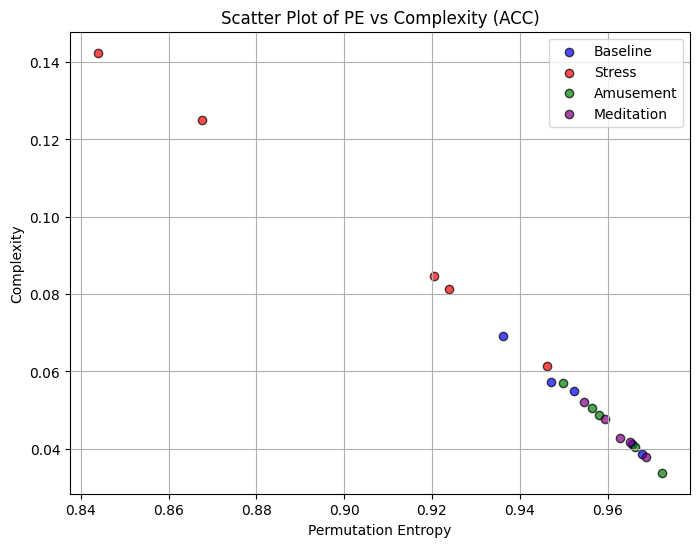

In [ ]:
acc_pe_complexity_results_dict = json.loads(acc_pe_complexity_results_json)

plt.figure(figsize=(8, 6))

# Scatter plot for each state
for i, state in enumerate(states):
    pe_value = []
    complexity_value = []
    for subject in acc_pe_complexity_results_dict.values():
        if state in subject:
            pe_value.append(subject[state]['Permutation_Entropy'])
            complexity_value.append(subject[state]['Complexity'])
    plt.scatter(pe_value, complexity_value, label=state, color=colors[i],alpha=0.7, edgecolors="k")

# Plotting Scatter Plot of PE vs Complexity (ACC)
plt.xlabel("Permutation Entropy")
plt.ylabel("Complexity")
plt.title("Scatter Plot of PE vs Complexity (ACC)")
plt.legend()
plt.grid(True)
plt.show()


**Insights (ACC):**

Here Stress exhibits higher complexity and lower entropy which indicates that it is more structured and predictable and regarding Baseline, Amusement and Meditation, they show high entropy and low complexity suggesting more randomness in the data.

**B) ECG Visualization using Scatter Plot**

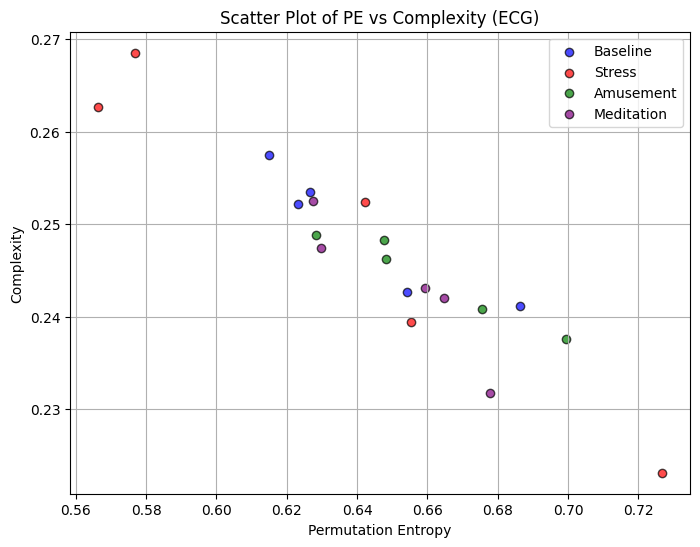

In [ ]:
ecg_pe_complexity_results_dict = json.loads(ecg_pe_complexity_results_json)

plt.figure(figsize=(8, 6))

# Scatter plot for each state
for i, state in enumerate(states):
    pe_value = []
    complexity_value = []
    for subject in ecg_pe_complexity_results_dict.values():
        if state in subject:
            pe_value.append(subject[state]['Permutation_Entropy'])
            complexity_value.append(subject[state]['Complexity'])
    plt.scatter(pe_value, complexity_value, label=state, color=colors[i],alpha=0.7, edgecolors="k")

# Plotting Scatter Plot of PE vs Complexity (ECG)
plt.xlabel("Permutation Entropy")
plt.ylabel("Complexity")
plt.title("Scatter Plot of PE vs Complexity (ECG)")
plt.legend()
plt.grid(True)
plt.show()

**Insights (ECG):**

The ECG-based scatter plot shows dispersed distribution compared to acceleration data. In this case, Stress exhibits higher complexity and lower entropy which indicates a more structured and predictable pattern in the heart's electrical activity In terms of Amusement and Meditation, they show high entropy and low complexity suggesting more irregularity in the ECG data.

**C) EDA Visualization using Scatter Plot**

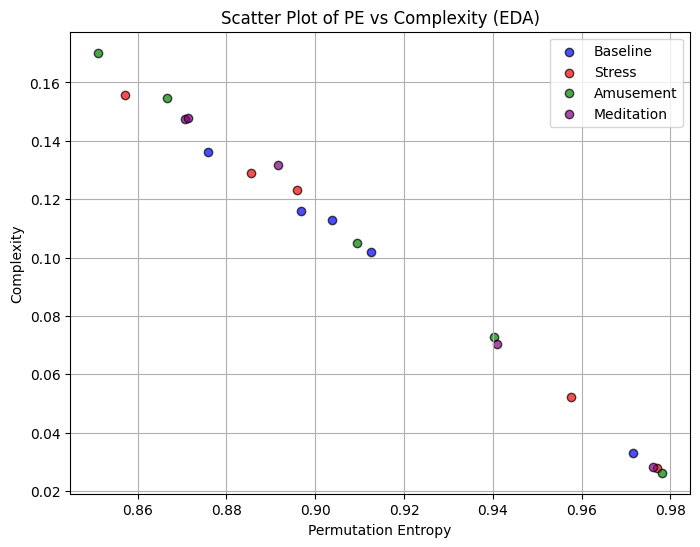

In [ ]:
eda_pe_complexity_results_dict = json.loads(eda_pe_complexity_results_json)

plt.figure(figsize=(8, 6))

# Scatter plot for each state
for i, state in enumerate(states):
    pe_value = []
    complexity_value = []
    for subject in eda_pe_complexity_results_dict.values():
        if state in subject:
            pe_value.append(subject[state]['Permutation_Entropy'])
            complexity_value.append(subject[state]['Complexity'])
    plt.scatter(pe_value, complexity_value, label=state, color=colors[i],alpha=0.7, edgecolors="k")

# Plotting Scatter Plot of PE vs Complexity (EDA)
plt.xlabel("Permutation Entropy")
plt.ylabel("Complexity")
plt.title("Scatter Plot of PE vs Complexity (EDA)")
plt.legend()
plt.grid(True)
plt.show()

**Insights (EDA):**

The EDA-based scatter plot shows Stress and Baseline exhibits higher complexity and lower entropy which indicates that it is more structured and predictable and regarding Meditation and Amusement, they show high entropy and low complexity suggesting more randomness in the data.

**D) EMG Visualization using Scatter Plot**

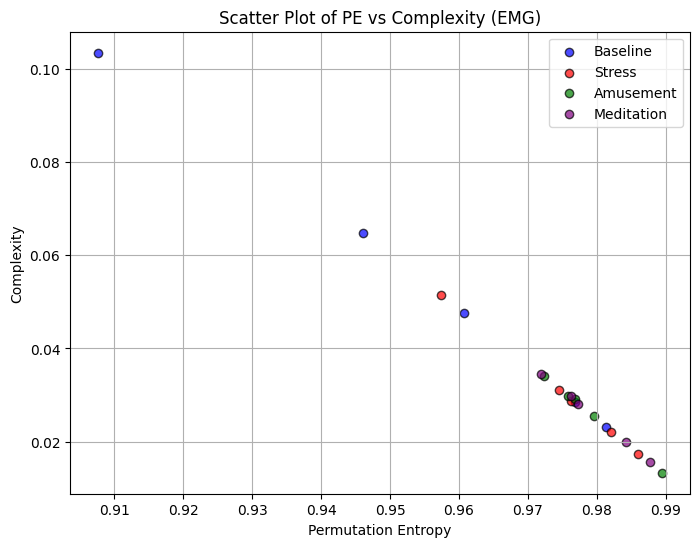

In [ ]:
emg_pe_complexity_results_dict = json.loads(emg_pe_complexity_results_json)

plt.figure(figsize=(8, 6))

# Scatter plot for each state
for i, state in enumerate(states):
    pe_value = []
    complexity_value = []
    for subject in emg_pe_complexity_results_dict.values():
        if state in subject:
            pe_value.append(subject[state]['Permutation_Entropy'])
            complexity_value.append(subject[state]['Complexity'])
    plt.scatter(pe_value, complexity_value, label=state, color=colors[i],alpha=0.7, edgecolors="k")

# Plotting Scatter Plot of PE vs Complexity (EMG)
plt.xlabel("Permutation Entropy")
plt.ylabel("Complexity")
plt.title("Scatter Plot of PE vs Complexity (EMG)")
plt.legend()
plt.grid(True)
plt.show()

**Insights (EMG):**

The EMG-based scatter plot shows Baseline exhibits higher complexity and lower entropy which indicates that it is more structured and predictable and regarding Amusement, Stress and Meditation, they show high entropy and low complexity suggesting more randomness in the data.

**E) RESP Visualization using Scatter Plot**

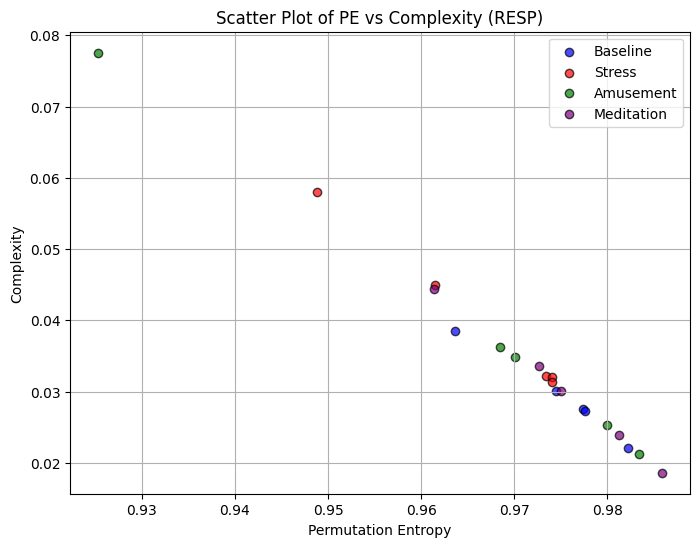

In [ ]:
resp_pe_complexity_results_dict = json.loads(resp_pe_complexity_results_json)

plt.figure(figsize=(8, 6))

# Scatter plot for each state
for i, state in enumerate(states):
    pe_value = []
    complexity_value = []
    for subject in resp_pe_complexity_results_dict.values():
        if state in subject:
            pe_value.append(subject[state]['Permutation_Entropy'])
            complexity_value.append(subject[state]['Complexity'])
    plt.scatter(pe_value, complexity_value, label=state, color=colors[i],alpha=0.7, edgecolors="k")

# Plotting Scatter Plot of PE vs Complexity (RESP)
plt.xlabel("Permutation Entropy")
plt.ylabel("Complexity")
plt.title("Scatter Plot of PE vs Complexity (RESP)")
plt.legend()
plt.grid(True)
plt.show()

**Insights (RESP):**

In the RESP-based scatter plot - Amusement, Stress, Meditation and Baseline exhibits high entropy and low complexity which indicates that it is more structured and predictable.

**F) TEMP Visualization using Scatter Plot**

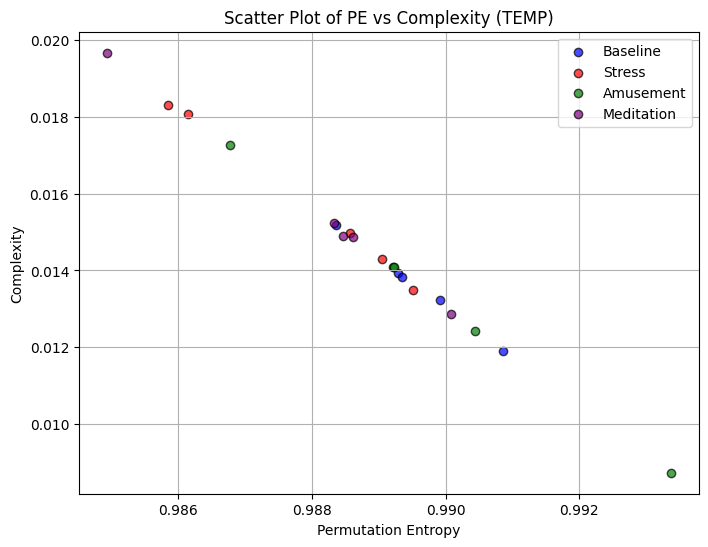

In [ ]:
temp_pe_complexity_results_dict = json.loads(temp_pe_complexity_results_json)

plt.figure(figsize=(8, 6))

# Scatter plot for each state
for i, state in enumerate(states):
    pe_value = []
    complexity_value = []
    for subject in temp_pe_complexity_results_dict.values():
        if state in subject:
            pe_value.append(subject[state]['Permutation_Entropy'])
            complexity_value.append(subject[state]['Complexity'])
    plt.scatter(pe_value, complexity_value, label=state, color=colors[i],alpha=0.7, edgecolors="k")

# Plotting Scatter Plot of PE vs Complexity (TEMP)
plt.xlabel("Permutation Entropy")
plt.ylabel("Complexity")
plt.title("Scatter Plot of PE vs Complexity (TEMP)")
plt.legend()
plt.grid(True)
plt.show()

**Insights (TEMP):**

In the TEMP-based scatter plot - Amusement, Stress, Meditation and Baseline exhibits high complexity and low entropy which indicating more randomness in the data.

------------------------------------------------------------------------------------- THE END ---------------------------------------------------------------------------------------------------